<a href="https://colab.research.google.com/github/LifeofAGeek/100-days-of-Applied-AI/blob/master/DIP_Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Anubhav Sethi**

1.  Find the phase angle of an image.

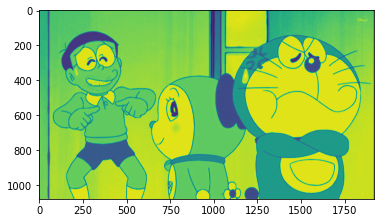

In [30]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from skimage import io

img = cv2.imread('/input.png', cv2.IMREAD_GRAYSCALE)
imgplot = plt.imshow(img)
plt.show()

def compute_mag_phase(toBeTransfromed):
    dft = np.fft.fft2(toBeTransfromed)
    dft_shift = np.fft.fftshift(dft)
    mag = np.abs(dft_shift)
    ang = np.angle(dft_shift)
    return mag, ang

2. Multiply the output of phase angle with some number, take from user.

In [19]:
Multiply_by = int(input("Enter some number: "))

Enter some number: 10


3. Reconstruct the image using inverse Fourier transform .

In [20]:
# Inverse FFT
def reconstruct(mag,ang):
    combined = np.multiply(mag, np.exp(1j*ang))
    fftx = np.fft.ifftshift(combined)
    ffty = np.fft.ifft2(fftx)
    imgCombined = np.abs(ffty)
    return imgCombined

In [22]:
magnitude , angle = compute_mag_phase(img)
print(magnitude," ",angle)

[[1.09685882 0.85053228 1.34964455 ... 0.49095233 1.34964455 0.85053228]
 [1.05060938 1.20378421 0.48013314 ... 1.03593049 0.37229421 0.47473522]
 [2.02215597 0.20755624 0.80123266 ... 1.20827426 1.03861958 1.06617812]
 ...
 [0.73549677 0.40893389 0.63855159 ... 0.61314436 1.86803057 0.6242705 ]
 [2.02215597 1.06617812 1.03861958 ... 0.70036161 0.80123266 0.20755624]
 [1.05060938 0.47473522 0.37229421 ... 1.01932537 0.48013314 1.20378421]]   [[ 3.14159265 -1.21923246  0.55000664 ...  0.22003149 -0.55000664
   1.21923246]
 [-0.19090485 -1.60814331  0.13875064 ... -1.67899218 -1.99692758
  -0.6845662 ]
 [-0.95718414 -0.25916507  1.59098429 ... -1.89510844 -3.13806059
  -1.16441172]
 ...
 [-3.06476699  2.69770865  0.31874034 ... -2.34868568  0.13533978
  -0.09083246]
 [ 0.95718414  1.16441172  3.13806059 ...  0.56561618 -1.59098429
   0.25916507]
 [ 0.19090485  0.6845662   1.99692758 ...  0.38801413 -0.13875064
   1.60814331]]


In [23]:
# multiplying the magnitude by the user input
New_Image = reconstruct(magnitude*Multiply_by,angle)

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['angle', 'phase_spectrum']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


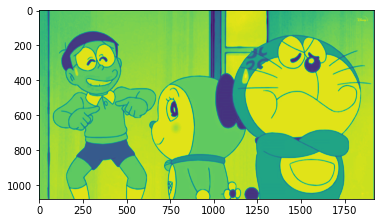

In [27]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

imgplot = plt.imshow(New_Image) # after inverse FFT
plt.show()